In [1]:
import warnings

import geopandas as gpd
import numpy as np
import momepy

from streetscape import StreetScape

In [2]:
warnings.filterwarnings(
    "ignore",
    category=RuntimeWarning,
    message="invalid value encountered in intersection",
)

In [3]:
streets = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="streets")
buildings = gpd.read_file(momepy.datasets.get_path("bubenec"), layer="buildings")

In [4]:
sc = StreetScape(streets, buildings)

In [5]:
sc.compute_sightline_indicators()

In [6]:
df = sc.sightline_df()

<Axes: >

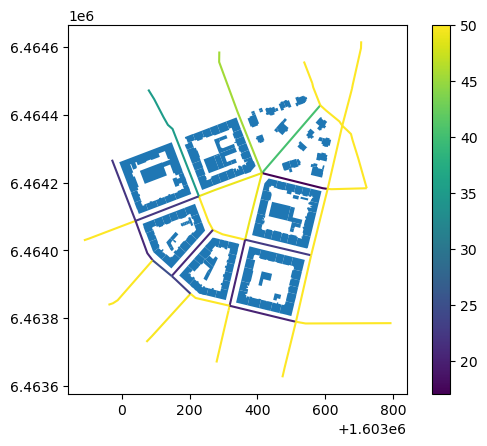

In [7]:
ax = sc.streets.plot(df.left_OS.apply(np.mean).values, legend=True)
buildings.plot(ax=ax)

In [8]:
plots = gpd.read_file("bubenec.gpkg", layer="plots").to_crs(streets.crs)
plots = plots.iloc[plots.sindex.query(streets.union_all().convex_hull)]
plots = plots.drop(plots.index[plots.sindex.query(streets.union_all(), predicate="intersects")])

<Axes: >

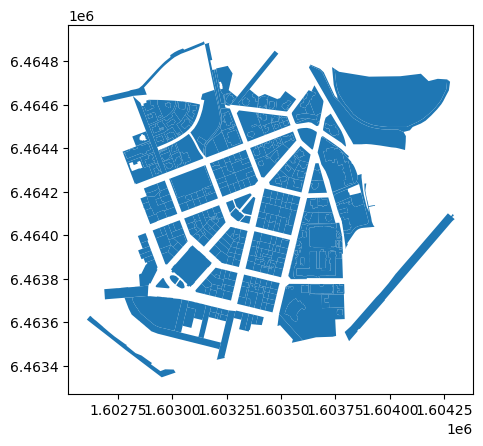

In [9]:
plots.plot(
)

In [12]:
sc.compute_plot_indicators(plots)

In [14]:
df_plots = sc.plot_df()

/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/martin/dev/uscuni/streetscape/.pixi/envs/default/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

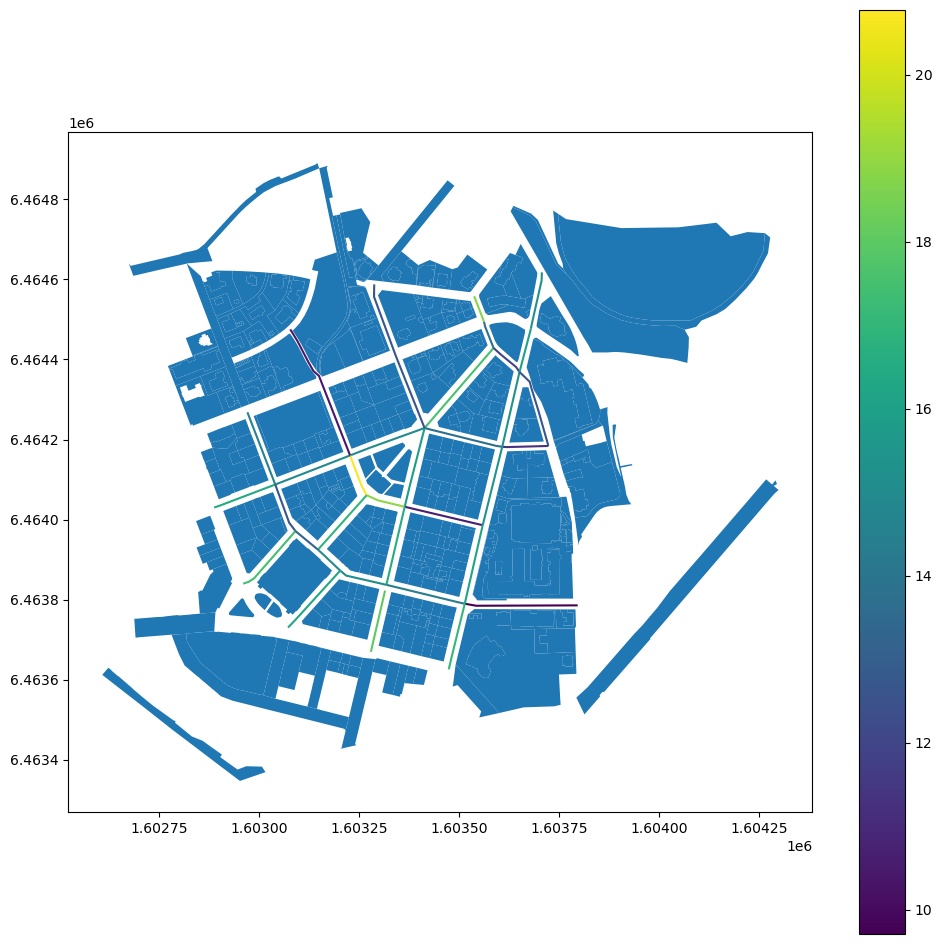

In [22]:
ax = sc.streets.plot(df_plots.right_parcel_SEQ_SB.apply(np.mean).values, legend=True, figsize=(12, 12))
plots.plot(ax=ax)